In [1]:
from LNN import *

from scipy.stats import lognorm
from scipy.spatial.distance import cosine

# matplotlib settings
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 8, # fontsize for x and y labels (was 10)
    'axes.titlesize': 8,
    'font.size': 8, # was 10
    'legend.fontsize': 6, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [2]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

In [3]:
def plot_vw_angle(N, k_v_max, k_w_max, ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    dist = np.zeros((k_v_max, k_w_max))
    k_vs = np.arange(k_v_max) + 1
    k_ws = np.arange(k_w_max) + 1
    for v_idx, k_v in enumerate(k_vs):
        for w_idx, k_w in enumerate(k_ws):
            v = LNN.struct_weight_maker(N=N, k=k_v)
            w = LNN.struct_weight_maker(N=N, k=k_w)
            dist[v_idx, w_idx] = np.abs(np.arccos(1-cosine(v, w)))
    img = ax.imshow(dist)
    return img

In [4]:
def plot_vw_angle_unstruct(N, mus_v, mus_w, sigma, reps=1000, ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    dist = np.zeros((mus_v.size, mus_w.size, reps))
    for v_idx, mu_v in enumerate(mus_v):
        for w_idx, mu_w in enumerate(mus_w):
            for rep in range(reps):
                v = 1. + LNN.unstruct_weight_maker(N, 'lognormal', loc=mu_v, scale=sigma)
                w = 1. + LNN.unstruct_weight_maker(N, 'lognormal', loc=mu_w, scale=sigma)
                dist[v_idx, w_idx, rep] = np.abs(np.arccos(1-cosine(v, w)))
    img = ax.imshow(np.mean(dist, axis=2), interpolation='spline36')
    return img

In [5]:
def plot_scatter_linear(N, s, kv, kw, trials, ax=None, color=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    lnn = LNN(N=N, kv=kv, kw=kw, sigmaC=0.25, sigmaM=0.25)
    data = lnn.simulate_noise_linear(s=s, trials=trials)
    esses = np.linspace(5, 35, 100)
    ax.plot(lnn.v[0] * esses, lnn.v[-1] * esses, zorder=10, color='k')
    if color is not None:
        ax.scatter(data[0], data[-1], color=color, label=r'$k_{\mathbf{w}} = %s$' %kw)
    else:
        ax.scatter(data[0], data[-1])

In [6]:
def plot_cosine_eig(N, s, kv, kws, ax=None, color=None):
    cosines = np.zeros(kws.size)
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    for idx, kw in enumerate(kws):
        lnn = LNN(N=N, kv=kv, kw=kw)
        cov = lnn.covar_lin()
        eigval, eigvec = np.linalg.eigh(cov)
        print(eigval)
        cosines[idx] = cosine(lnn.v, eigvec[:, -3])
    ax.plot(kws, cosines)

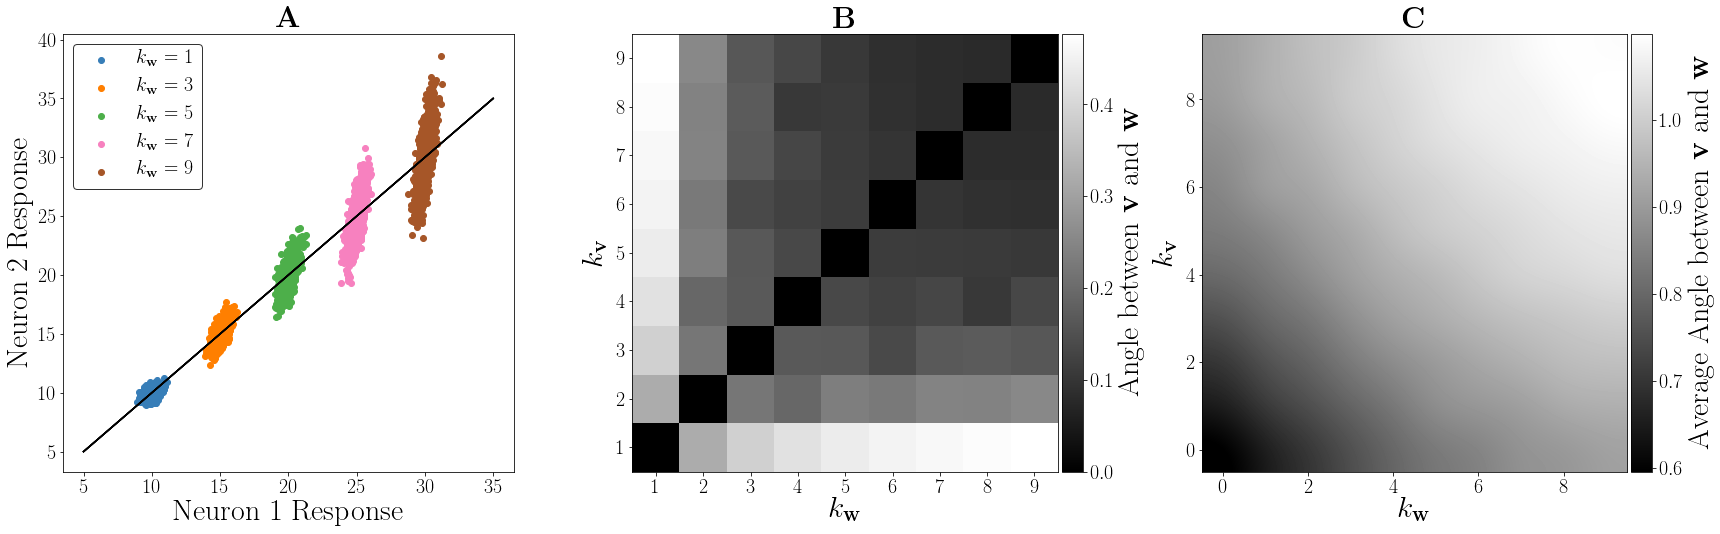

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(24,8))

plot_scatter_linear(N=1000, s=10, kv=1, kw=1, trials=1000, ax=axes[0], color=colors[0])
plot_scatter_linear(N=1000, s=15, kv=1, kw=3, trials=1000, ax=axes[0], color=colors[1])
plot_scatter_linear(N=1000, s=20, kv=1, kw=5, trials=1000, ax=axes[0], color=colors[2])
plot_scatter_linear(N=1000, s=25, kv=1, kw=7, trials=1000, ax=axes[0], color=colors[3])
plot_scatter_linear(N=1000, s=30, kv=1, kw=9, trials=1000, ax=axes[0], color=colors[4])
lgd = axes[0].legend(prop={'size' : 20})
lgd.get_frame().set_edgecolor('k')
axes[0].tick_params(labelsize=20)
axes[0].set_xlabel(r'Neuron 1 Response', fontsize=30)
axes[0].set_ylabel(r'Neuron 2 Response', fontsize=30)
axes[0].set_title(r'$\mathbf{A}$', fontsize=30)

img1 = plot_vw_angle(N=1000, k_v_max=9, k_w_max=9, ax=axes[1])
axes[1].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=30)
axes[1].set_ylabel(r'$k_{\mathbf{v}}$', fontsize=30)
axes[1].tick_params(labelsize=20)
axes[1].set_xticks(np.arange(9))
axes[1].set_yticks(np.arange(9))
axes[1].set_xticklabels(np.arange(9) + 1)
axes[1].set_yticklabels(np.arange(9) + 1)
axes[1].set_title(r'$\mathbf{B}$', fontsize=30)
cb1 = colorbar(img1) 
cb1.ax.tick_params(labelsize=20)
cb1.ax.set_ylabel(r'Angle between $\mathbf{v}$ and $\mathbf{w}$', fontsize=30)
axes[1].set_aspect('auto')

img2 = plot_vw_angle_unstruct(N=100, mus_v=np.linspace(-1, 2, 10), mus_w=np.linspace(-1, 2, 10), sigma=1, ax=axes[2])
axes[2].set_title(r'$\mathbf{C}$', fontsize=30)
cb2 = colorbar(img2)
cb2.ax.tick_params(labelsize=20)
cb2.ax.set_ylabel(r'Average Angle between $\mathbf{v}$ and $\mathbf{w}$', fontsize=30)
axes[2].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=30)
axes[2].set_ylabel(r'$k_{\mathbf{v}}$', fontsize=30)
axes[2].tick_params(labelsize=20)
axes[2].set_aspect('auto')

plt.tight_layout(rect=[0, 0.0, 1, 0.94])
plt.savefig('figure5.pdf')